In [2]:
import gym
import gym_nav
import proplot as pplt
import matplotlib.pyplot as plt
from read_experiments import *

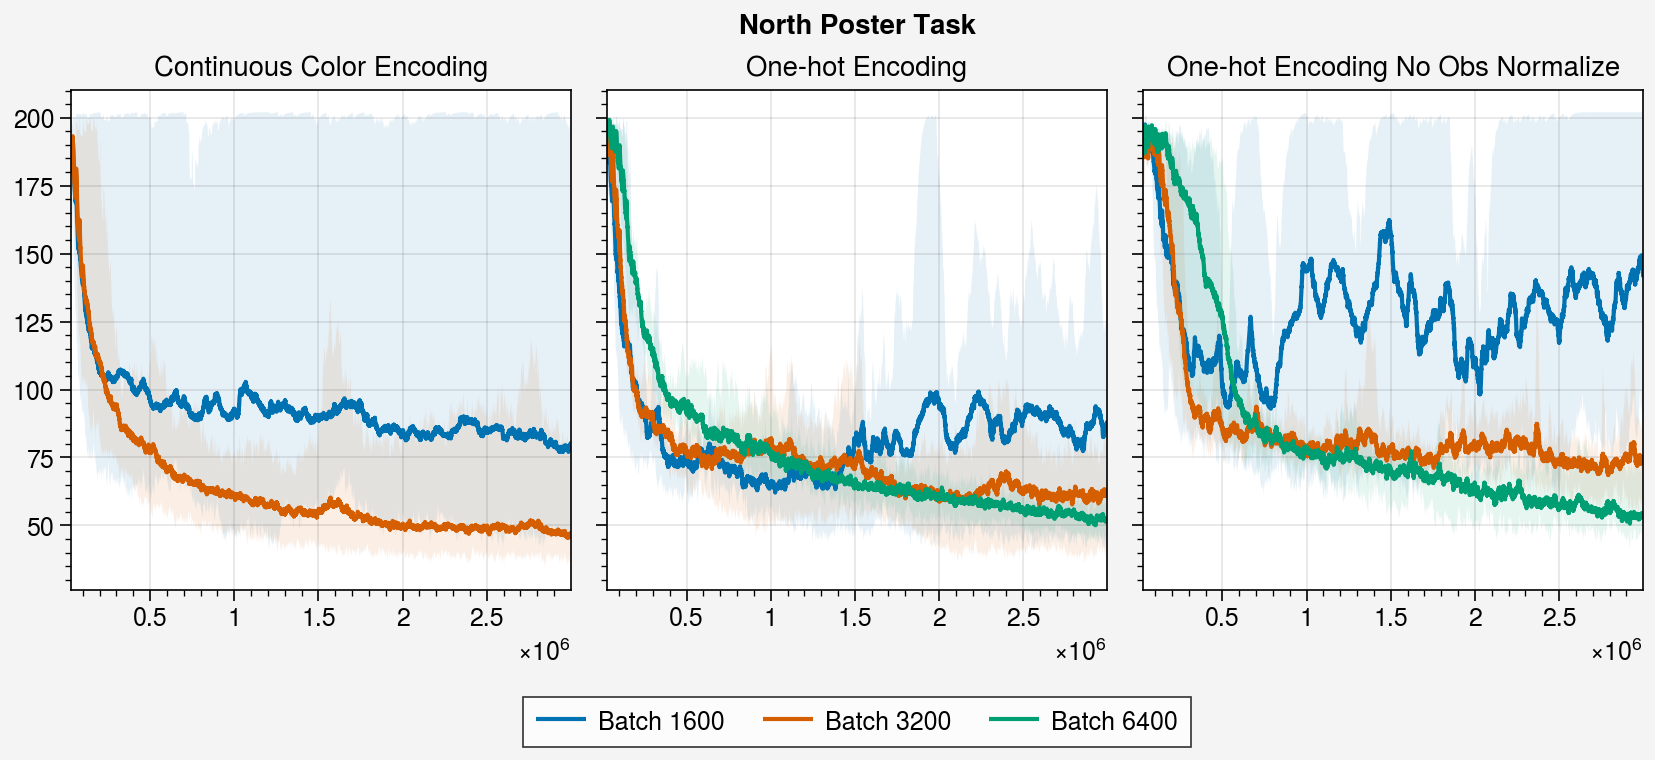

In [16]:
fig, ax = pplt.subplots(ncols=3)

batch_sizes = [16, 32, 64]
exps = ['nav_pnorth/nav_pdistal_batch{}auxnone', 'nav_pnorth/nav_pnorth_batch{}onehot',
        'nav_pnorth/nav_pnorth_batch{}onehotnovec']

for i, exp in enumerate(exps):
    lines = []
    for batch in batch_sizes:
        if i == 0 and batch == 64:
            continue
        lines.append(average_runs(exp.format(batch), 'length', ignore_first=100, ax=ax[i], label=f'Batch {batch*100}'))
        
ax.format(title=['Continuous Color Encoding', 'One-hot Encoding', 'One-hot Encoding No Obs Normalize'], suptitle='North Poster Task')
fig.legend(lines, loc='b')

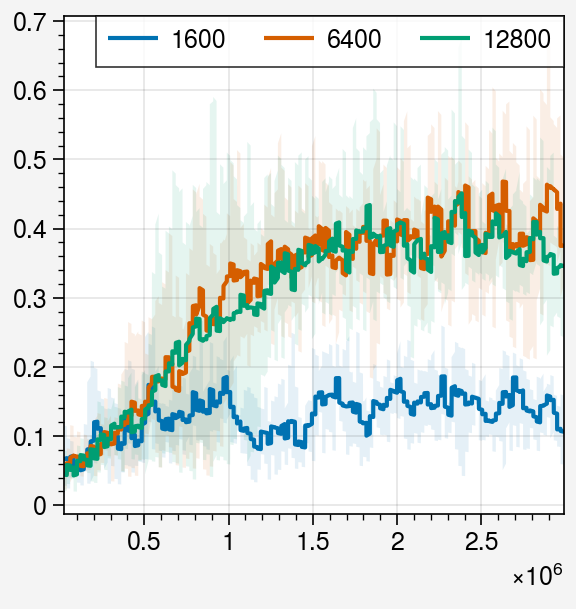

In [15]:
batch_sizes = [16, 64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}onehot', ax=ax, label=f'{batch*100}')
    
ax.legend()